Enter choice as 1 or 2
2
(960, 720)
(960, 720)


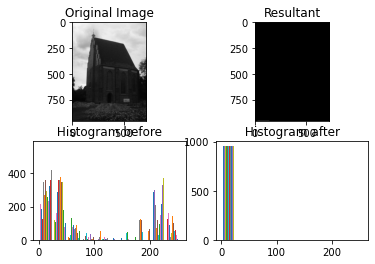

In [2]:
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from numpy import pi
import cv2

def NVG(choice):
    image = 'contrast.jpg'
    if choice == 1:
        I = np.float64(cv2.imread(image))/255
        I = np.mean(I,2)
        sigma = 2
        #Calculates the DFT of the image
        DFT2d_I = np.fft.fft2(I)

        #Calculation of the Gaussian
        xsize , ysize = I.shape
        Nr = np.fft.ifftshift(list(range(int(-np.fix(ysize/2)),int(np.ceil(ysize/2)))))
        Nc = np.fft.ifftshift(list(range(int(-np.fix(xsize/2)),int(np.ceil(xsize/2)))))
        Nc, Nr = np.meshgrid(Nc, Nr)
        dft_gauss_kernel = np.exp(-2*(sigma**2)*(pi**2)*((Nr/ysize)**2+(Nc/xsize)**2))

        #Convolution with the Gaussian (fft (I). * Fft (G))
        DFT2d_I_convolved = DFT2d_I * np.matlib.repmat(dft_gauss_kernel,1,1).T
        I_convolved = np.fft.ifft(DFT2d_I_convolved)
        M = np.real(I_convolved)

        output = np.zeros((xsize,ysize))
        for i in range(xsize):
            for j in range(ysize):
                output[i][j] = (I[i][j])**(2**(2*M[i][j]-1))
        plt.figure()
        plt.subplot(2,2,1)
        plt.imshow(I,cmap='gray')
        plt.title('Original Image')
        plt.subplot(2,2,2)
        plt.imshow(output,cmap='gray') 
        plt.title('Resultant')
        plt.subplot ( 2 , 2 , 3 ) 
        plt.hist(I) 
        plt.title (' Histogram before ')
        plt.subplot ( 2 , 2 , 4 ) 
        plt.hist(output) 
        plt.title ( ' Histogram after ' )

    
    else:
        
        #read image
        I = np.float64(cv2.imread(image))
        I = np.mean(I,2)

        #Calculates the inverse image
        Inv = 255 - I

        #Calculates the DFT
        DFT2d_I = np.fft.fft2(Inv)

        #Gaussian Caclule
        sigma=2;
        xsize , ysize= I.shape
        Nr = np.fft.ifftshift(list(range(int(-np.fix(ysize/2)),int(np.ceil(ysize/2)))))
        Nc = np.fft.ifftshift(list(range(int(-np.fix(xsize/2)),int(np.ceil(xsize/2)))))
        Nc, Nr = np.meshgrid(Nc, Nr)
        dft_gauss_kernel = np.exp(-2*(sigma**2)*(pi**2)*((Nr/ysize)**2+(Nc/xsize)**2))

        #Convolution with the Gaussian (fft (I). * Fft (G))
        DFT2d_I_convolved = DFT2d_I * np.matlib.repmat(dft_gauss_kernel,1,1).T
        I_convolved = np.fft.ifft(DFT2d_I_convolved)
        M = np.real(I_convolved)


        output = np.zeros((xsize,ysize))
        for i in range(xsize):
            for j in range(ysize):
                output[i][j] = 255.0*((I[i][j]/255.0)**(2**((128.0-M[i][j]/128.0))))
        print(I.shape)
        print(output.shape)
        plt.figure()
        plt.subplot(2,2,1)
        plt.imshow(I,cmap='gray')
        plt.title('Original Image')
        plt.subplot(2,2,2)
        plt.imshow(output,cmap='gray') 
        plt.title('Resultant')
        plt.subplot ( 2 , 2 , 3 ) 
        plt.hist(I) 
        plt.title (' Histogram before ')
        plt.subplot ( 2 , 2 , 4 ) 
        plt.hist(output) 
        plt.title ( ' Histogram after ' )

choice = int(input('Enter choice as 1 or 2\n'))
NVG(choice)